In [200]:
import pandas as pd
import matplotlib
import numpy
from matplotlib import interactive

In [201]:
interactive(True)

In [202]:
#Reading the dataset in a dataframe using Pandas
df = pd.read_csv("C:/Users/Jigarkumar Patel/Downloads/Data Science Project/3 Loan Data Prediction/train.csv") 
dft = pd.read_csv("C:/Users/Jigarkumar Patel/Downloads/Data Science Project/3 Loan Data Prediction/test.csv") 

In [203]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [204]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [205]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [206]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

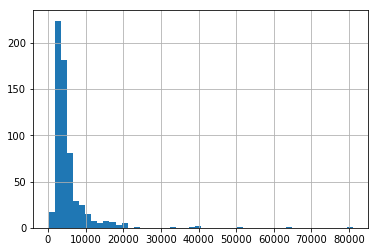

In [207]:
df['ApplicantIncome'].hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE0F66C630>]], dtype=object)

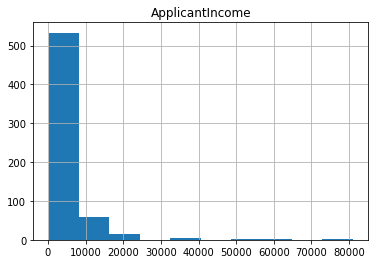

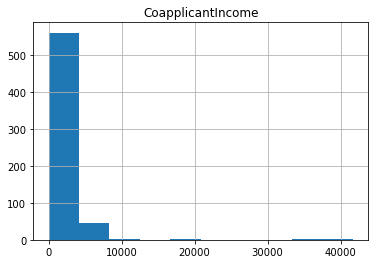

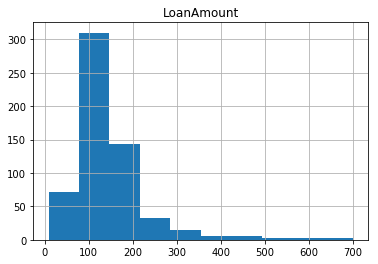

In [208]:
df.hist('ApplicantIncome')
df.hist('CoapplicantIncome')
df.hist('LoanAmount')


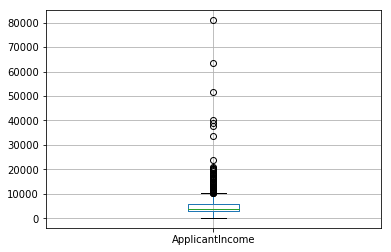

In [209]:
df.boxplot(column='ApplicantIncome')

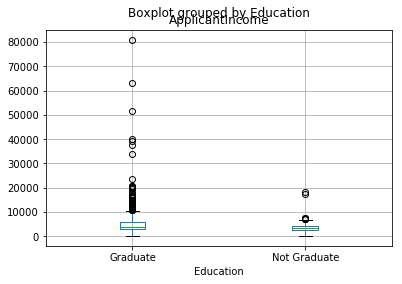

In [210]:
df.boxplot(column='ApplicantIncome', by = 'Education')

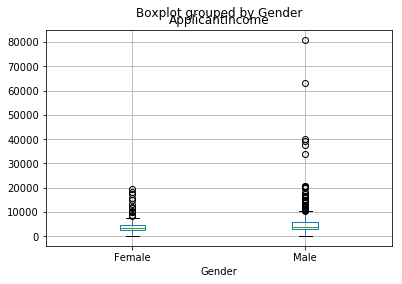

In [211]:
df.boxplot(column='ApplicantIncome', by = 'Gender')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE0F78B6A0>]], dtype=object)

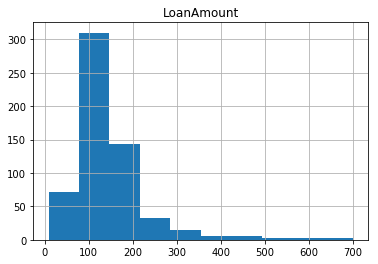

In [212]:
df.hist('LoanAmount')

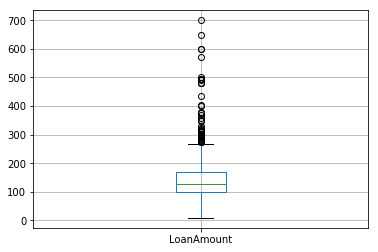

In [213]:
df.boxplot(column='LoanAmount')

In [214]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (temp1)

print ('\nProbility of getting loan for each Credit History class:') 
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


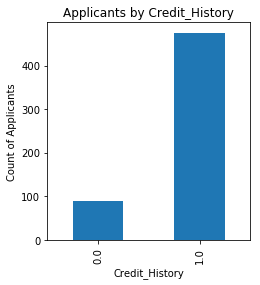

In [215]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')


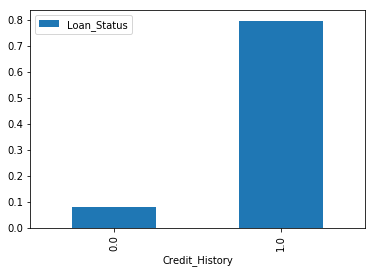

In [216]:

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

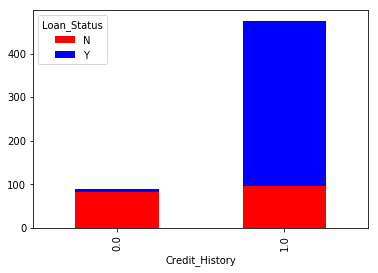

In [217]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

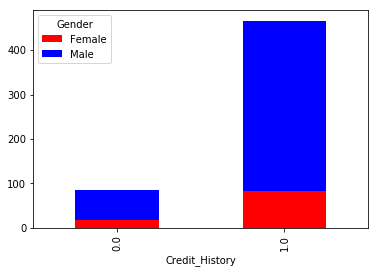

In [218]:
temp4 = pd.crosstab(df['Credit_History'], df['Gender'])
temp4.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [219]:
 df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [220]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [221]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [222]:
df['Self_Employed'].fillna('No',inplace=True)

In [223]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=numpy.median)

In [224]:
# Define function to return value of this pivot_table
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]

In [225]:
# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

ValueError: invalid fill value with a <class 'pandas.core.frame.DataFrame'>

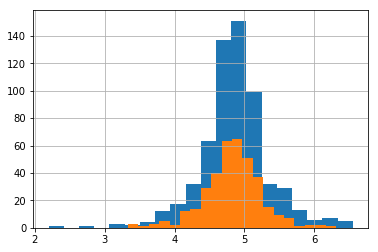

In [226]:
df['LoanAmount_log'] = numpy.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

dft['LoanAmount_log'] = numpy.log(dft['LoanAmount'])
dft['LoanAmount_log'].hist(bins=20)

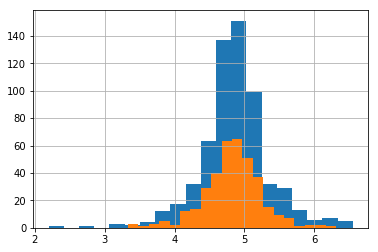

In [227]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = numpy.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20) 

dft['TotalIncome'] = dft['ApplicantIncome'] + dft['CoapplicantIncome']
dft['TotalIncome_log'] = numpy.log(dft['TotalIncome'])
dft['LoanAmount_log'].hist(bins=20) 

In [228]:
 df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [229]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [230]:
df['Gender'].fillna('Male',inplace=True)
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [231]:
df['Married'].value_counts()
df['Married'].fillna('Yes',inplace=True)
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [232]:
df['Dependents'].value_counts()
df['Dependents'].fillna('0',inplace=True)
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [233]:
df['Loan_Amount_Term'].value_counts()
df['Loan_Amount_Term'].fillna(360.0,inplace=True)
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [234]:
df['Credit_History'].value_counts()
df['Credit_History'].fillna(1.0,inplace=True)
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [235]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [236]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [237]:
def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
  
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(numpy.mean(error)))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])

In [243]:
#Model1

outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [245]:
dft.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
LoanAmount_log        5
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [248]:
dft['Credit_History'].value_counts()
dft['Credit_History'].fillna(1.0,inplace=True)
dft.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History        0
Property_Area         0
LoanAmount_log        5
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [261]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['TotalIncome','Credit_History']

model.fit(df[predictor_var],df[outcome_var])
predictions = model.predict(dft[predictor_var])
num=0
for i in predictions:
    print(dft['Loan_ID'][num],",",i)
    num+=1

LP001015 , 1
LP001022 , 1
LP001031 , 1
LP001035 , 1
LP001051 , 1
LP001054 , 1
LP001055 , 1
LP001056 , 0
LP001059 , 1
LP001067 , 1
LP001078 , 1
LP001082 , 1
LP001083 , 1
LP001094 , 0
LP001096 , 1
LP001099 , 1
LP001105 , 1
LP001107 , 1
LP001108 , 1
LP001115 , 1
LP001121 , 1
LP001124 , 1
LP001128 , 1
LP001135 , 1
LP001149 , 1
LP001153 , 0
LP001163 , 1
LP001169 , 1
LP001174 , 1
LP001176 , 1
LP001177 , 1
LP001183 , 1
LP001185 , 1
LP001187 , 1
LP001190 , 1
LP001203 , 0
LP001208 , 1
LP001210 , 1
LP001211 , 1
LP001219 , 1
LP001220 , 1
LP001221 , 1
LP001226 , 1
LP001230 , 1
LP001231 , 1
LP001232 , 1
LP001237 , 1
LP001242 , 1
LP001268 , 1
LP001270 , 1
LP001284 , 1
LP001287 , 1
LP001291 , 1
LP001298 , 1
LP001312 , 1
LP001313 , 0
LP001317 , 1
LP001321 , 1
LP001323 , 0
LP001324 , 1
LP001332 , 1
LP001335 , 1
LP001338 , 1
LP001347 , 0
LP001348 , 1
LP001351 , 1
LP001352 , 0
LP001358 , 0
LP001359 , 1
LP001361 , 0
LP001366 , 1
LP001368 , 1
LP001375 , 1
LP001380 , 1
LP001386 , 1
LP001400 , 1
LP001407 , 1

In [241]:
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [182]:
#model 2

model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [183]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 89.414%
Cross-Validation Score : 68.397%


In [184]:
#model 3
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 77.529%


In [186]:
#Create a series with feature importances

featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Credit_History      0.272485
TotalIncome_log     0.262848
LoanAmount_log      0.220627
Dependents          0.055697
Property_Area       0.049818
Loan_Amount_Term    0.042170
Married             0.026524
Self_Employed       0.023989
Education           0.023826
Gender              0.022016
dtype: float64


In [188]:
#model 4

model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 82.899%
Cross-Validation Score : 80.946%
